## Support Vector Machine

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC

model = SVC()

In [3]:
db = load_iris()

In [5]:
iris = pd.DataFrame(db.data, columns=db.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris["target"] = db.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
dir(db)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris["species name"] = iris.target.apply(lambda x: db.target_names[x])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Creating Test and Trainning data

In [11]:
X = iris.drop(["target","species name"], axis = 1)
y = iris.target

In [16]:
print(len(y),len(X))

150 150


In [35]:
# test_train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
# importing gridsearchcv
from sklearn.model_selection import GridSearchCV

model = SVC()
param = {"C": [1,5,10,20,40,80,100], "kernel" : ("linear","rbf"), "gamma" : ['scale', 'auto']}

iris_grid = GridSearchCV(model, param_grid=param ,cv=5, return_train_score=True)

In [36]:
iris_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 40, 80, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf')},
             return_train_score=True)

In [37]:
iris_grid.score(X_test, y_test)

1.0

In [38]:
iris_grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

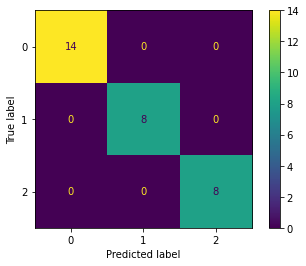

In [59]:
y_prid = iris_grid.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_prid, y_test)


ConfusionMatrixDisplay(cm).plot();

## Excercise

In [60]:
from sklearn.datasets import load_digits

df2 = load_digits()

In [61]:
dir(df2)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [64]:
len(df2.data)

1797

In [69]:
df2.target

array([0, 1, 2, ..., 8, 9, 8])

In [73]:
X = pd.DataFrame(df2.data, columns=df2.feature_names)
X.head(2) #8*8 pixs

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [75]:
y = pd.DataFrame(df2.target)
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [84]:
# Parameters
model = SVC()
param = {"C": [100,1000], "kernel" : ("linear","rbf"), "gamma" : ['scale', 'auto']}

digit_grid = GridSearchCV(model, param_grid=param ,cv=5)

#digit_grid.fit(X,y)

In [88]:
digit_grid.fit(df2.data[:-2], df2.target[:-2])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf')})

8 8


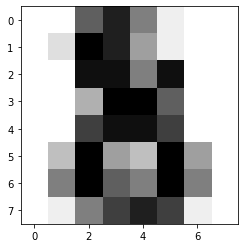

In [94]:
print(prid[1],df2.target[-1])
plt.imshow(df2.images[-1], cmap = plt.cm.gray_r, interpolation="nearest");

predict :  [0]
predict :  [2]
predict :  [4]
predict :  [0]
predict :  [1]
predict :  [4]
predict :  [7]
predict :  [7]
predict :  [4]
predict :  [4]
predict :  [8]
predict :  [6]
predict :  [2]
predict :  [4]
predict :  [2]
predict :  [6]
predict :  [4]
predict :  [5]
predict :  [4]
predict :  [3]


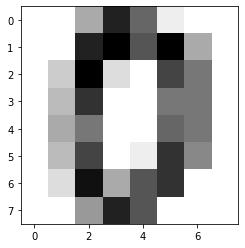

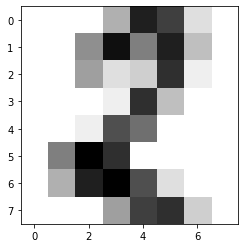

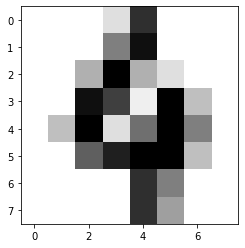

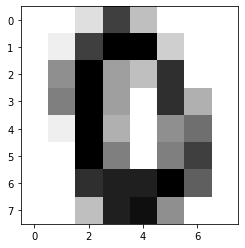

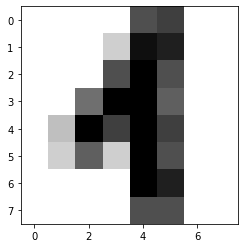

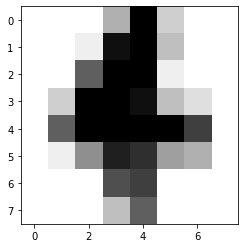

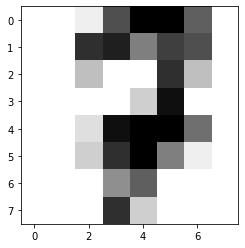

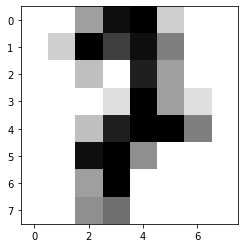

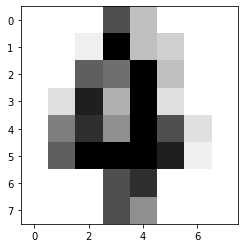

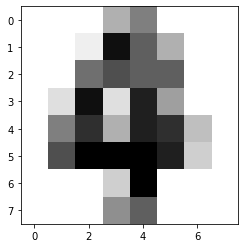

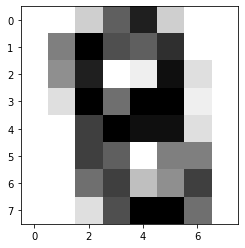

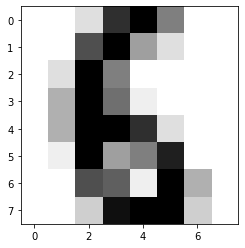

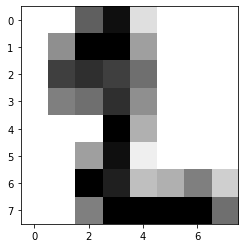

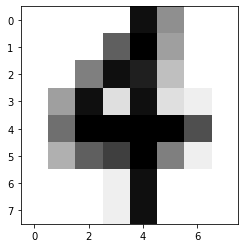

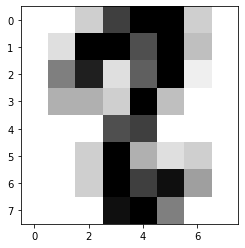

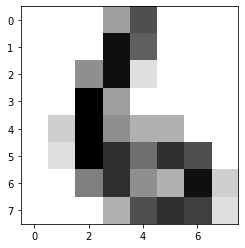

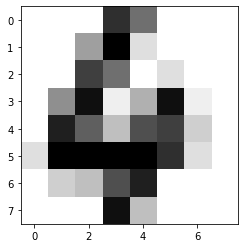

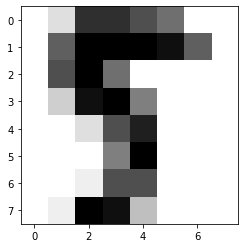

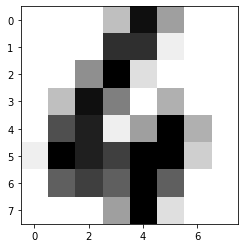

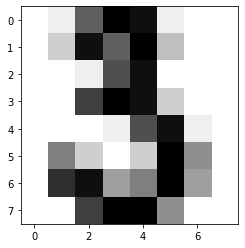

In [112]:
j = 1
for i in range(0,1000,50):
    plt.figure(j)
    j += 1
    print("predict : ",digit_grid.predict(df2.data[i].reshape(1,64)))
    plt.imshow(df2.images[i], cmap = plt.cm.gray_r, interpolation="nearest");
    